In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
# Load the dataset
file_path = "/kaggle/input/insurance/insurance.csv"
df = pd.read_csv(file_path)

# Display basic info to confirm successful loading
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(None,
    age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


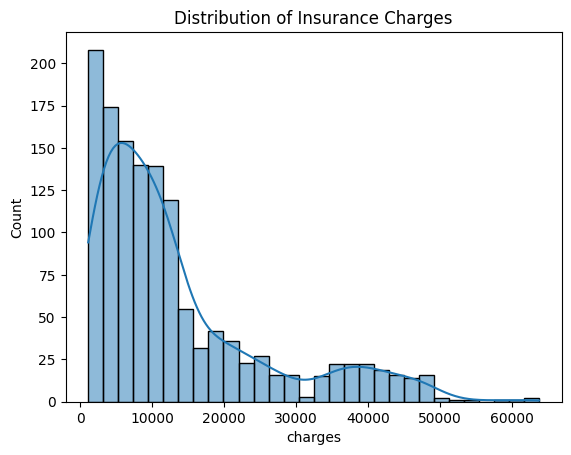

In [4]:
# Display basic information
df.info()

# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe()

# Visualize distribution of target variable
sns.histplot(df["charges"], bins=30, kde=True)
plt.title("Distribution of Insurance Charges")
plt.show()


In [5]:
# Define categorical and numerical features
categorical_features = ["sex", "smoker", "region"]
numerical_features = ["age", "bmi", "children"]

# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features),
    ]
)

# Define features and target variable
X = df.drop(columns=["charges"])
y = df["charges"]

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1070, 6), (268, 6), (1070,), (268,))

In [6]:
svm_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", SVR(kernel="rbf"))
])

# Train SVM model
svm_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm_pipeline.predict(X_test)


In [7]:
dt_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", DecisionTreeRegressor(random_state=42))
])

# Train Decision Tree model
dt_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_pipeline.predict(X_test)


In [8]:
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train Random Forest model
rf_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_pipeline.predict(X_test)


In [9]:
def evaluate(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Performance:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    print("-" * 40)
    
    return {"Model": model_name, "MSE": mse, "MAE": mae, "R² Score": r2}

# Evaluate all models
results = []
results.append(evaluate(y_test, y_pred_svm, "Support Vector Machine"))
results.append(evaluate(y_test, y_pred_dt, "Decision Tree"))
results.append(evaluate(y_test, y_pred_rf, "Random Forest"))


Support Vector Machine Performance:
Mean Squared Error (MSE): 166348088.6339
Mean Absolute Error (MAE): 8606.5923
R² Score: -0.0715
----------------------------------------
Decision Tree Performance:
Mean Squared Error (MSE): 40795333.4541
Mean Absolute Error (MAE): 3114.1529
R² Score: 0.7372
----------------------------------------
Random Forest Performance:
Mean Squared Error (MSE): 20864569.5134
Mean Absolute Error (MAE): 2543.9758
R² Score: 0.8656
----------------------------------------


In [10]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
results_df


,Model,MSE,MAE,R² Score
0,Support Vector Machine,1.663481e+08,8606.592261,-0.071494
1,Decision Tree,4.079533e+07,3114.152909,0.737226
2,Random Forest,2.086457e+07,2543.975825,0.865606


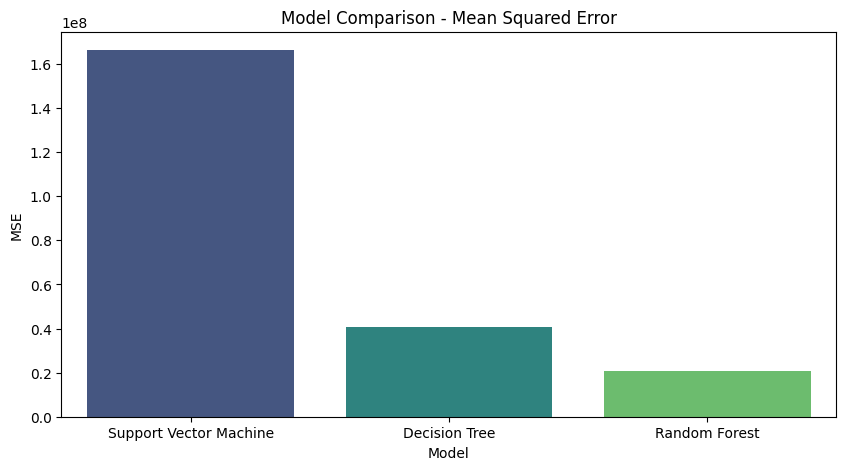

In [11]:
# Plot comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df["Model"], y=results_df["MSE"], palette="viridis")
plt.title("Model Comparison - Mean Squared Error")
plt.ylabel("MSE")
plt.show()
